#  Understanding overfitting, underfitting, and regularization
### by adjusting key parameters of various supervised learning models - Regression and Classification.

First, run the following block to set up the variables needed for later sections.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#generate sin funciton data for the model
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

<IPython.core.display.Javascript object>


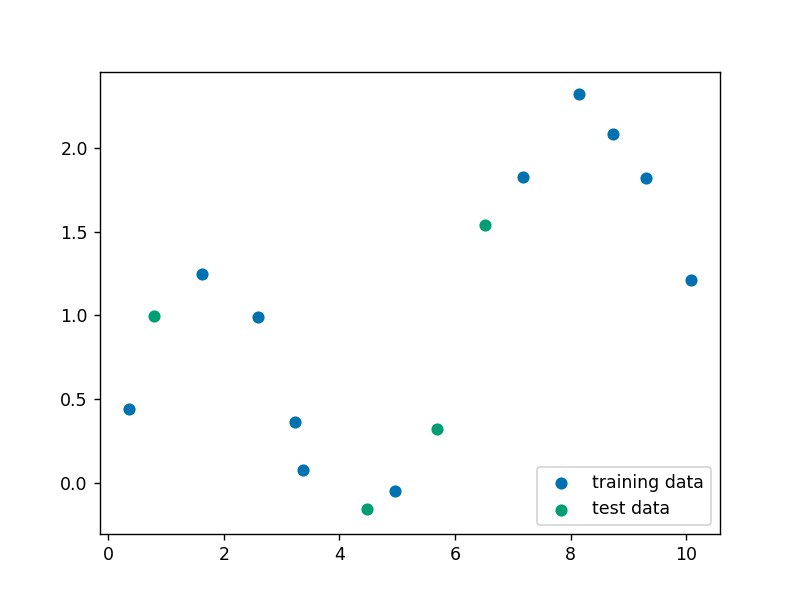

In [2]:
#visualize data 
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

In [7]:
#fit a polynomial linear regression model on the training data for degrees 1,3,6 and 9.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #to create polynomial features
X_train, y_train, X_test, y_test = X_train.reshape((-1,1)), y_train.reshape((-1,1)),\
                                    X_test.reshape((-1,1)), y_test.reshape((-1,1)) 
X_predict = np.linspace(0,10,100).reshape((-1,1))
deg_array = np.empty((4,100))  #returns array with outputs from 1,3,6, and 9 polynomial regression.
for j,deg in enumerate([1,3,6,9]):
    X_train_poly = PolynomialFeatures(degree=deg).fit_transform(X_train)
    X_test_poly = PolynomialFeatures(degree=deg).fit_transform(X_test)
    X_predict_poly = PolynomialFeatures(degree=deg).fit_transform(X_predict)
    lng = LinearRegression().fit(X_train_poly, y_train)
    append_arr = lng.predict(X_predict_poly).reshape(1,-1)
    deg_array[j] = append_arr
#lng.score(X_test_poly, y_test)
deg_array[1,:]

array([1.22989539, 1.15143628, 1.07722393, 1.00717881, 0.94122142,
       0.87927223, 0.82125174, 0.76708043, 0.71667877, 0.66996727,
       0.62686639, 0.58729663, 0.55117847, 0.5184324 , 0.4889789 ,
       0.46273845, 0.43963155, 0.41957867, 0.4025003 , 0.38831692,
       0.37694902, 0.36831709, 0.3623416 , 0.35894305, 0.35804192,
       0.35955869, 0.36341384, 0.36952787, 0.37782126, 0.38821449,
       0.40062805, 0.41498241, 0.43119808, 0.44919552, 0.46889523,
       0.49021769, 0.51308339, 0.53741281, 0.56312643, 0.59014474,
       0.61838823, 0.64777737, 0.67823266, 0.70967458, 0.74202361,
       0.77520024, 0.80912495, 0.84371823, 0.87890056, 0.91459243,
       0.95071432, 0.98718672, 1.02393011, 1.06086498, 1.09791181,
       1.13499108, 1.17202328, 1.2089289 , 1.24562842, 1.28204233,
       1.3180911 , 1.35369523, 1.3887752 , 1.42325149, 1.45704459,
       1.49007498, 1.52226316, 1.55352959, 1.58379478, 1.61297919,
       1.64100332, 1.66778766, 1.69325268, 1.71731887, 1.73990

<IPython.core.display.Javascript object>


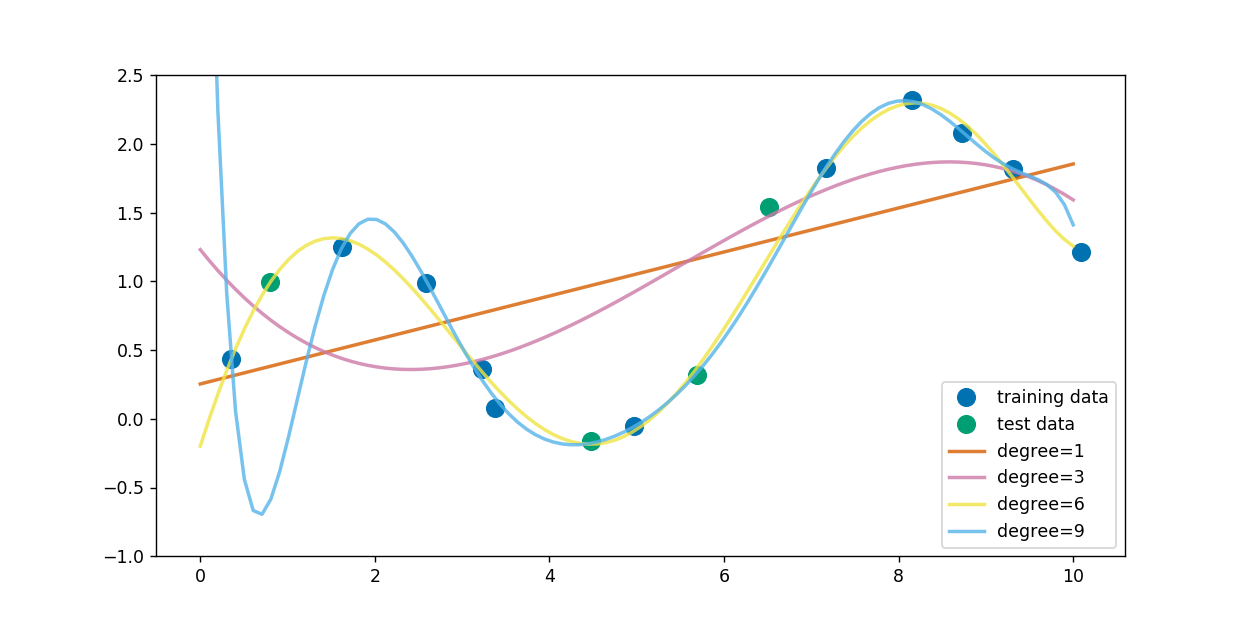

In [6]:
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), deg_array[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1,2.5)
plt.legend(loc=4)

In [11]:
#fit a polynomial linear regression model on the training data for degress 0 to 9. Also comput R^2 on trainig
# and test data 
from sklearn.metrics import r2_score
X_trains, y_trains, X_tests, y_tests = X_train.reshape((-1,1)), y_train.reshape((-1,1)),\
                                    X_test.reshape((-1,1)), y_test.reshape((-1,1)) 
r2_trainf = np.empty((10,1))
r2_testf = np.empty((10,1))
for j,deg in enumerate(list(range(10))):
    X_train_poly = PolynomialFeatures(degree=deg).fit_transform(X_trains)
    X_test_poly = PolynomialFeatures(degree=deg).fit_transform(X_tests)
    lng = LinearRegression().fit(X_train_poly, y_trains)
    train_pred = lng.predict(X_train_poly)
    test_pred = lng.predict(X_test_poly)
    r2_train = lng.score(X_train_poly, y_trains)
    r2_test = lng.score(X_test_poly, y_tests)
    r2_trainf[j] = r2_train
    r2_testf[j] = r2_test
r2_trainf

array([[0.        ],
       [0.42924578],
       [0.4510998 ],
       [0.58719954],
       [0.91941945],
       [0.97578641],
       [0.99018233],
       [0.99352509],
       [0.99637545],
       [0.99803706]])

<IPython.core.display.Javascript object>


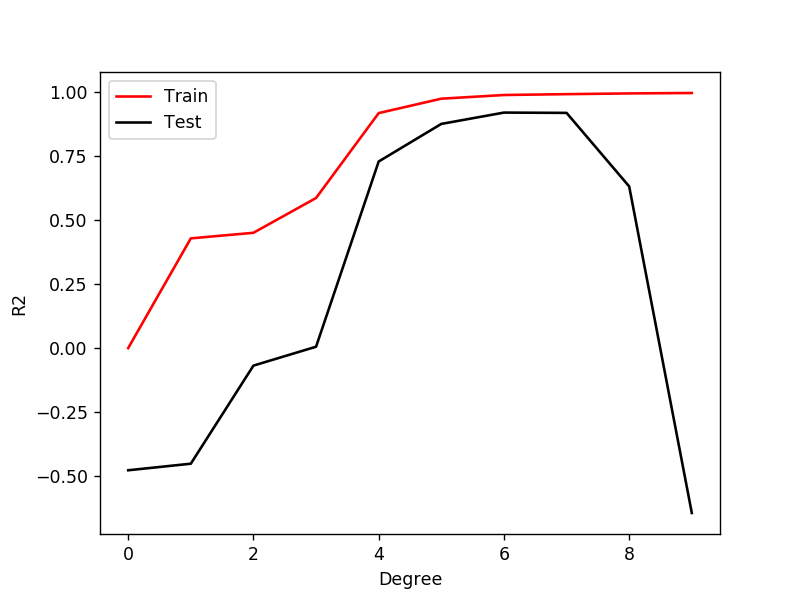

In [12]:
# plot R^2 against degree to understand the level of over or underfitting 
plt.figure()
x = np.array(list(range(10)))
r2_train = answer_two()[0].flatten()
r2_test = answer_two()[1].flatten()
plt.plot(x, r2_train, color='red', label='Train')
plt.plot(x, r2_test, color='black', label='Test')
plt.xlabel('Degree')
plt.ylabel('R2')
plt.legend()


In [15]:
# higer degree models can have a problem of overfitting and hence they require regularization. 
# the following code demonstrates that the value of R^2 has been significantly imporved after regularization
# that is afte using the lasso regression.
from sklearn.linear_model import Lasso
Lasso(alpha=0.01, max_iter=10000)
X_trains, y_trains, X_tests, y_tests = X_train.reshape((-1,1)), y_train.reshape((-1,1)),\
                                    X_test.reshape((-1,1)), y_test.reshape((-1,1)) 
X_train_poly = PolynomialFeatures(degree=12).fit_transform(X_trains)
X_test_poly = PolynomialFeatures(degree=12).fit_transform(X_tests)
lng = LinearRegression().fit(X_train_poly, y_trains)
lag = Lasso(alpha=0.01, max_iter=10000).fit(X_train_poly, y_trains)
lng_pred = lng.predict(X_test_poly)
lag_pred = lag.predict(X_test_poly)
r2_lng = r2_score(y_true=y_tests, y_pred=lng_pred)
r2_lag = r2_score(y_true=y_tests, y_pred=lag_pred)
print(r2_lng)
print(r2_lag)

-4.311980552748659
0.8406625614750354


C:\Users\sharm.LAPTOP-118C54MT\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  positive)


In [16]:
#import mashroom data to understand model complexity for classification models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
mush_df = pd.read_csv(r'C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_3\Assignment_2/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
# Use the variables X_subset, y_subset to get subset of data.
X_subset = X_test2
y_subset = y_test2

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0).fit(X_train2,y_train2)
fet_importance = tree_clf.feature_importances_
ind = fet_importance.argsort()[-5 :][::-1]
col_list = [] #list of columns in data 
for ind in ind:
    col_list.append(X_train2.columns[ind]) 
col_list

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
SVC(kernel='rbf', C=1, random_state=0)
param_range = np.logspace(-4,1,6)
SVC_clf = SVC(kernel='rbf', C=1, random_state=0)
train_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1, random_state=0), X_subset, y_subset,\
                                             param_name='gamma',param_range=param_range, scoring='accuracy')
print([train_scores, test_scores])

[array([[0.85098522, 0.82830769, 0.82584615, 0.83569231, 0.82769231],
       [0.94396552, 0.93661538, 0.93846154, 0.93784615, 0.94030769],
       [0.99014778, 0.99138462, 0.99076923, 0.992     , 0.99076923],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]]), array([[0.85012285, 0.83990148, 0.84236453, 0.81034483, 0.81527094],
       [0.91646192, 0.94334975, 0.94827586, 0.95073892, 0.92857143],
       [0.995086  , 0.98275862, 0.99014778, 0.99753695, 0.98522167],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.995086  , 0.99753695, 1.        , 1.        , 1.        ],
       [0.52334152, 0.52216749, 0.52216749, 0.52216749, 0.52216749]])]


<IPython.core.display.Javascript object>


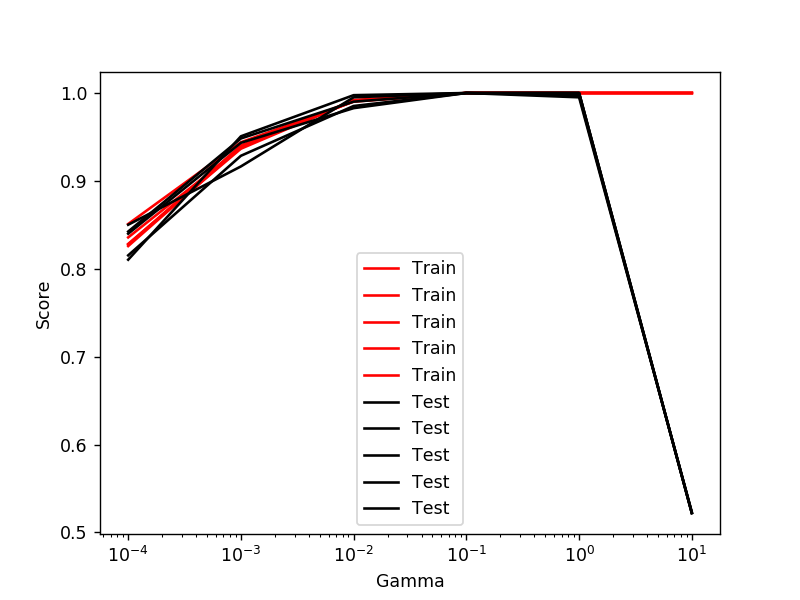

In [19]:
#let's plot the value of train and test scores against gamma to understand which values of gamma overfits
plt.figure()
x = np.logspace(-4,1,6)
plt.semilogx(x, train_scores, color='red', label='Train')
plt.semilogx(x, test_scores, color='black', label='Test')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.legend()